# Part 1
Data Preparation


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.cm.Set2
plt.rcParams['figure.figsize'] = (10, 6)

countries = ['wsm', 'usa', 'tha', 'tur', 'vnm']
data_path = 'ddf--datapoints--population--by--country--age--gender--year/'

data = {}
for country in countries:
    data[country] = pd.read_csv(f'{data_path}ddf--datapoints--population--by--country-{country}--age--gender--year.csv')

df = pd.concat(data.values(), keys=data.keys()).reset_index(level=1, drop=True).reset_index().drop(columns = ['index'])


Line Plot

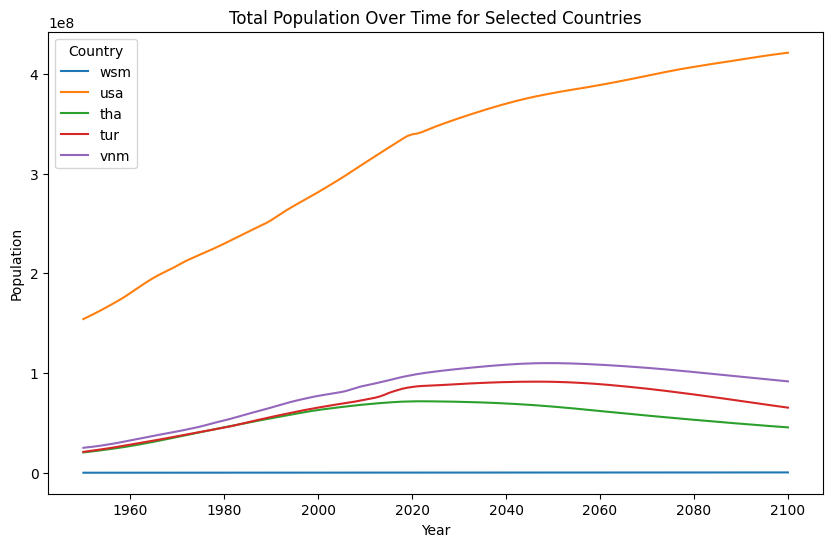

In [20]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['population'] = pd.to_numeric(df['population'], errors='coerce')
total_population = df.groupby(['country', 'year'])['population'].sum().reset_index()

plt.figure()
for country in countries:
    country_data = total_population[total_population['country'] == country]
    plt.plot(country_data['year'], country_data['population'], label=country)

# Customize plot
plt.title('Total Population Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Country')
plt.show()


Stacked Bar Chart

C:\Users\borau\AppData\Local\Temp\ipykernel_5796\3817060230.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution = df_age.groupby(['year', 'age_group'])['population'].sum().unstack(fill_value=0)


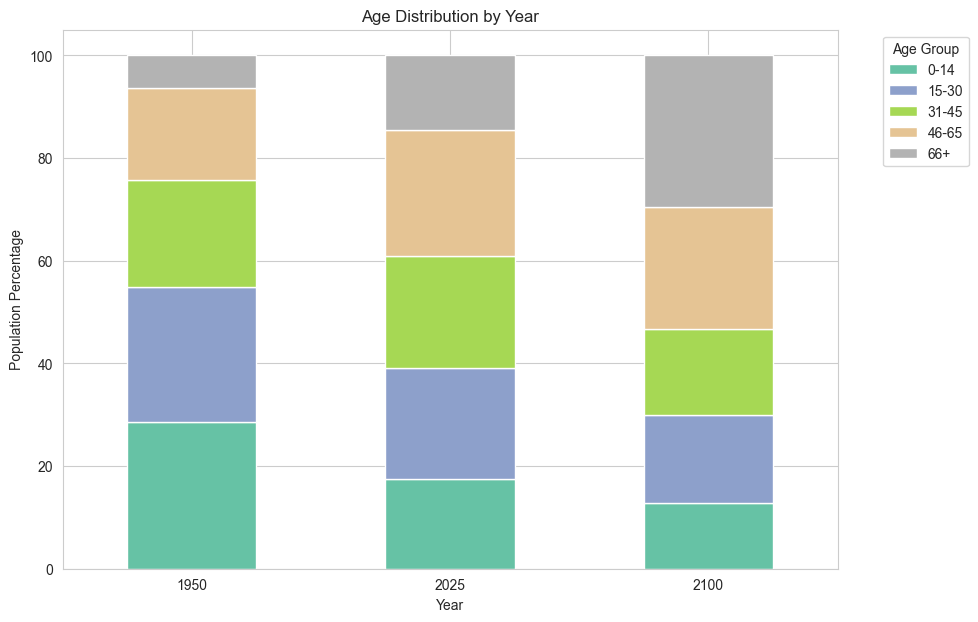

In [32]:
years = [1950, 2020, 2100]
df_age = df[df['year'].isin(years)]
age_groups = ['0-14', '15-30', '31-45', '46-65', '66+']
df['age_group'] = pd.cut(df['age'], bins= [0, 14, 30, 45, 65, 100], labels=age_groups, right=True)
age_distribution = df_age.groupby(['year', 'age_group'])['population'].sum().unstack(fill_value=0)
age_distribution_percent = age_distribution.div(age_distribution.sum(axis=1), axis=0) * 100

ax = age_distribution_percent.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 7))
plt.title("Age Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Population Percentage")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()



# Part 2
Heatmap

C:\Users\borau\AppData\Local\Temp\ipykernel_5796\5272372.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution_hm = df_2020.groupby(['country', 'age_group'])['population'].sum().unstack(fill_value=0)


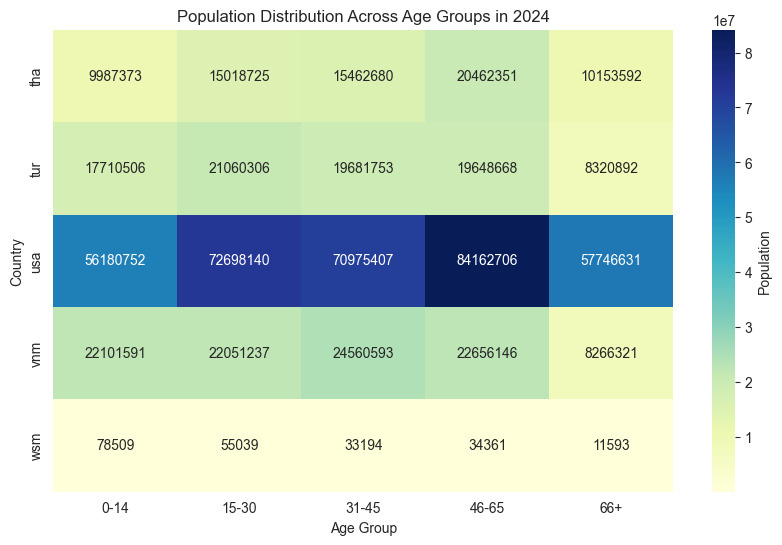

In [40]:
sns.set_style("whitegrid")
df_2020 = df[df['year'] == 2024]
age_distribution_hm = df_2020.groupby(['country', 'age_group'])['population'].sum().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(age_distribution_hm, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Population'})
plt.title("Population Distribution Across Age Groups in 2024")
plt.xlabel("Age Group")
plt.ylabel("Country")
plt.show()

Violin Plots

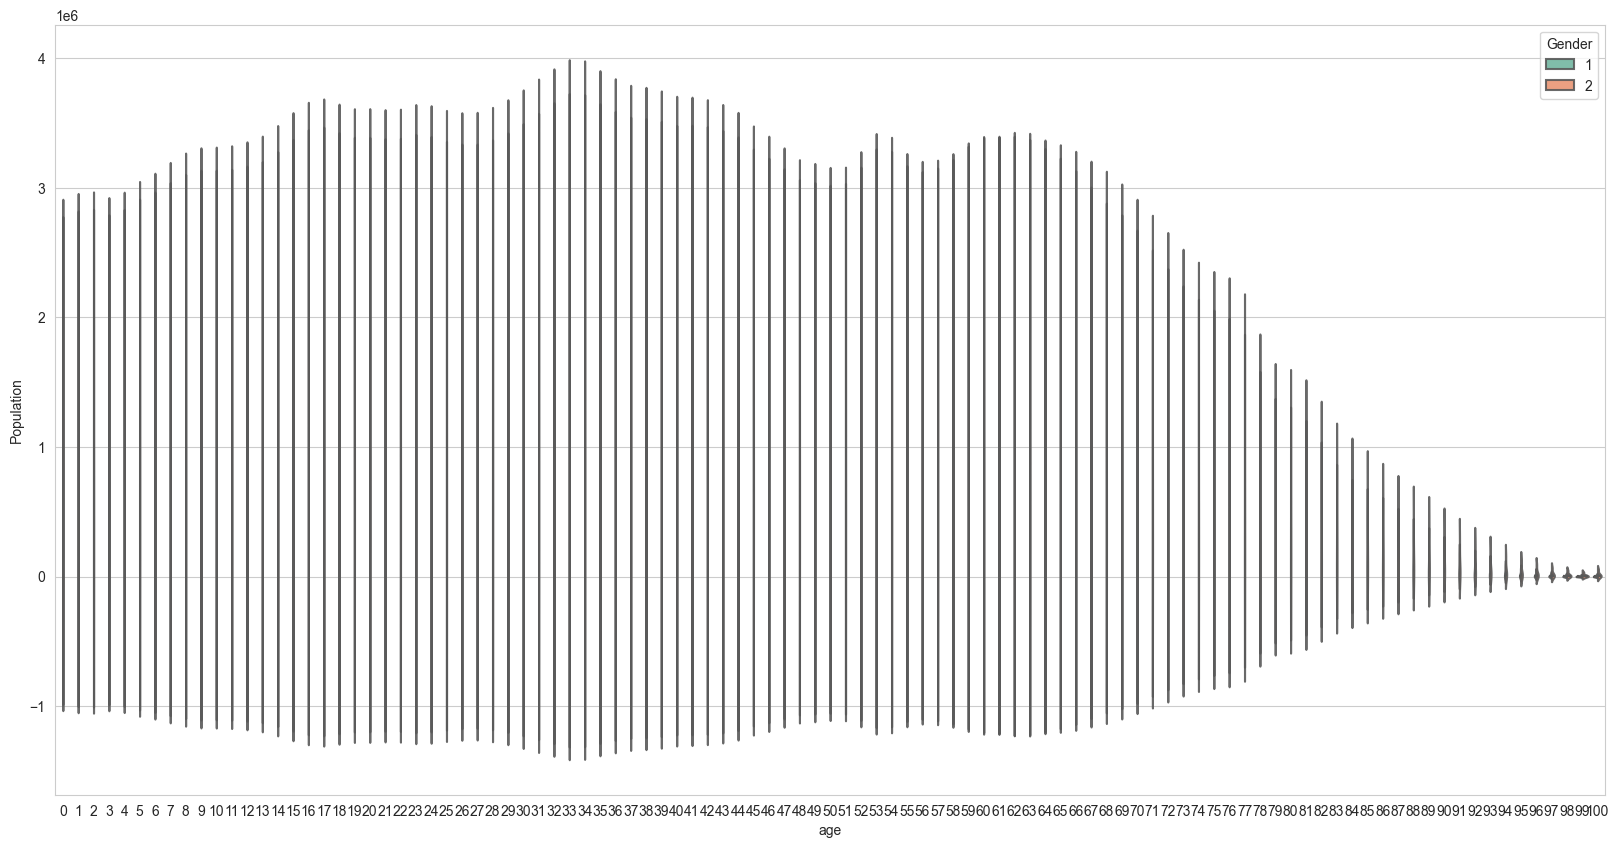

In [47]:
df_2020_countries = df_2020[df_2020['country'].isin(['usa', 'tha'])]

plt.figure(figsize=(20, 10))
sns.violinplot(x='age', y='population', hue='gender', data=df_2020, split=True, palette='Set2', alpha=0.9, inner='quartile', linewidth=1.5)
sns.color_palette("husl", 8)
plt.ylabel("Population")
plt.legend(title='Gender')
plt.show()


Pairplot

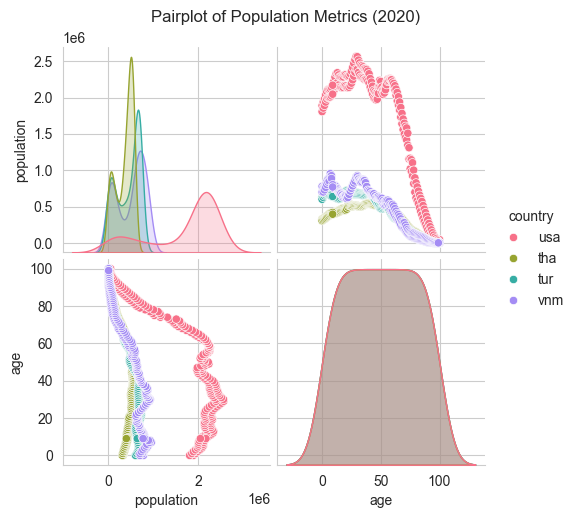

In [42]:
selected_countries = ['usa', 'tha', 'tur', 'vnm']
df_pairplot = df[df['country'].isin(selected_countries) & (df['year'] == 2020)]

sns.pairplot(df_pairplot, hue='country', vars=['population', 'age'], palette='husl')
plt.suptitle("Pairplot of Population Metrics (2020)", y=1.02)
plt.show()
